In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("processed_ms_data.csv")

## 1. Walking speed analysis

<Figure size 800x600 with 0 Axes>

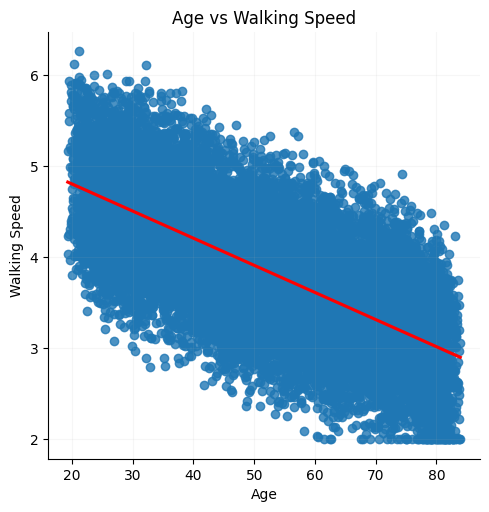

In [55]:
# Scatter plot of age vs walking speed with regression line
plt.figure(figsize=(8, 6))
sns.lmplot(data=data, x="age", y="walking_speed", line_kws={"color": "red"})
plt.title("Age vs Walking Speed")
plt.xlabel("Age")
plt.ylabel("Walking Speed")
plt.grid(alpha=0.1)
plt.savefig("scatterplot_age_speed.png", dpi=300)
plt.show()

/var/folders/m3/cjk44zyd71sd0l71hpnfvwwc0000gn/T/ipykernel_25473/970956473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= data, x="education_level", y="walking_speed", palette="Set2")


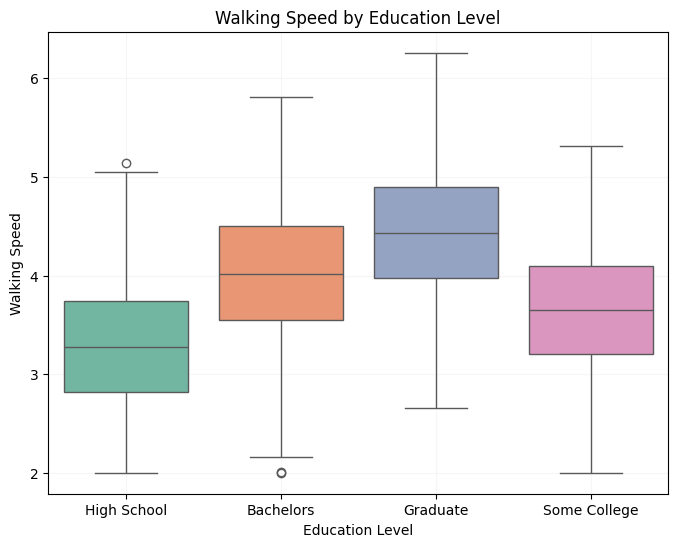

In [56]:
# Box plots of walking speed by education level
plt.figure(figsize=(8, 6))
sns.boxplot(data= data, x="education_level", y="walking_speed", palette="Set2")
plt.title("Walking Speed by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Walking Speed")
plt.grid(alpha=0.1)
plt.savefig("boxplot_education_speed.png", dpi=300)
plt.show()

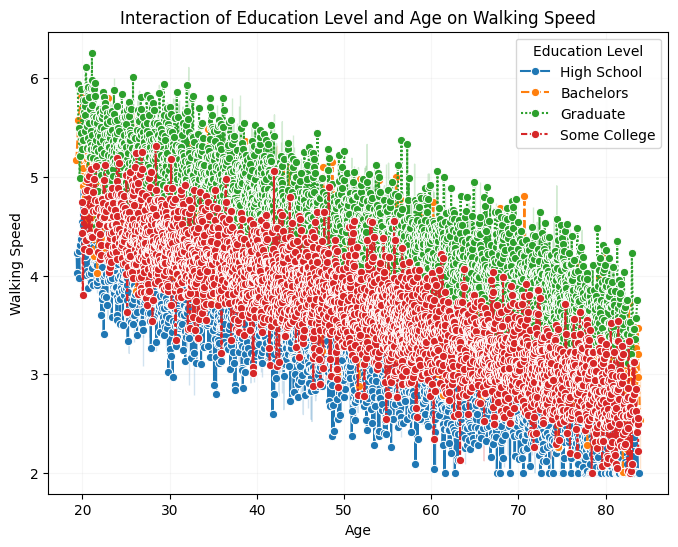

In [57]:
# Line plot showing education-age interaction
plt.figure(figsize=(8, 6))
sns.lineplot(data=data, x="age", y="walking_speed", hue="education_level", style="education_level", marker='o')
plt.title("Interaction of Education Level and Age on Walking Speed")
plt.xlabel("Age")
plt.ylabel("Walking Speed")
plt.legend(title="Education Level")
plt.grid(alpha=0.1)
plt.savefig("lineplot_edu_age_speed.png", dpi=300)
plt.show()

## 2. Cost analysis

/var/folders/m3/cjk44zyd71sd0l71hpnfvwwc0000gn/T/ipykernel_25473/3094897526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="insurance_type", y="visit_cost", errorbar="sd", palette="Set1")


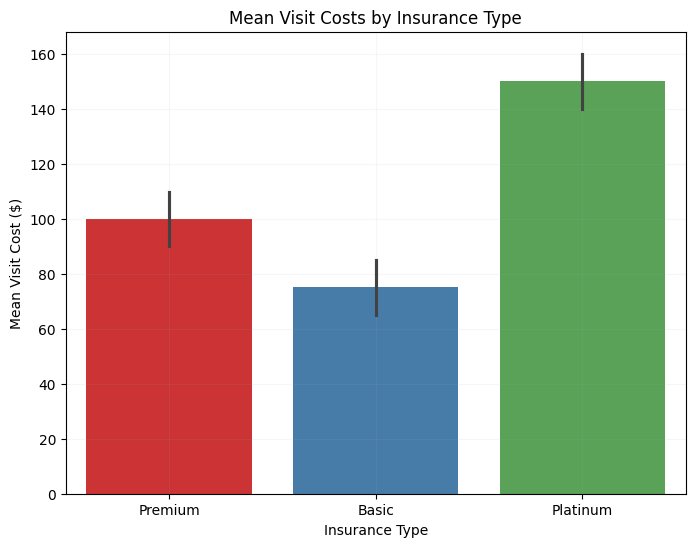

In [58]:
# Bar plot of mean costs by insurance type
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x="insurance_type", y="visit_cost", errorbar="sd", palette="Set1")
plt.title("Mean Visit Costs by Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Mean Visit Cost ($)")
plt.grid(alpha=0.1)
plt.savefig("barplot_mean_costs_insurance.png", dpi=300)
plt.show()

/var/folders/m3/cjk44zyd71sd0l71hpnfvwwc0000gn/T/ipykernel_25473/1564017550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="insurance_type", y="visit_cost", palette="Set1")


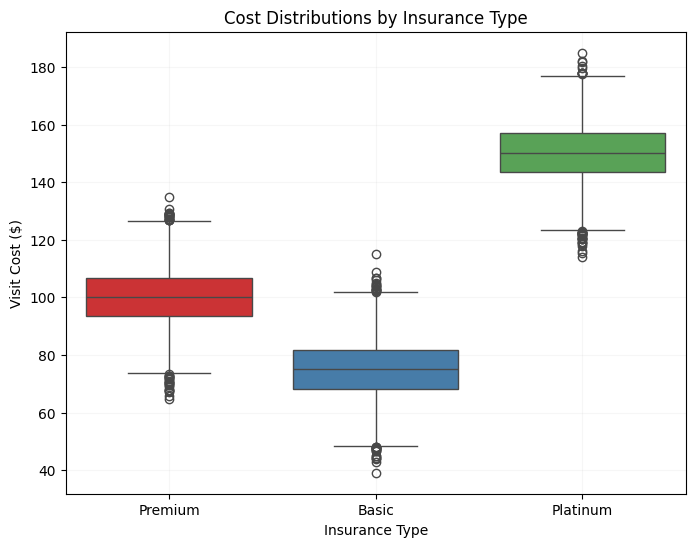

In [59]:
# Box plots showing cost distributions
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="insurance_type", y="visit_cost", palette="Set1")
plt.title("Cost Distributions by Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Visit Cost ($)")
plt.grid(alpha=0.1)
plt.savefig("boxplot_costs_insurance.png", dpi=300)
plt.show()

## 3. Combined vsualizations

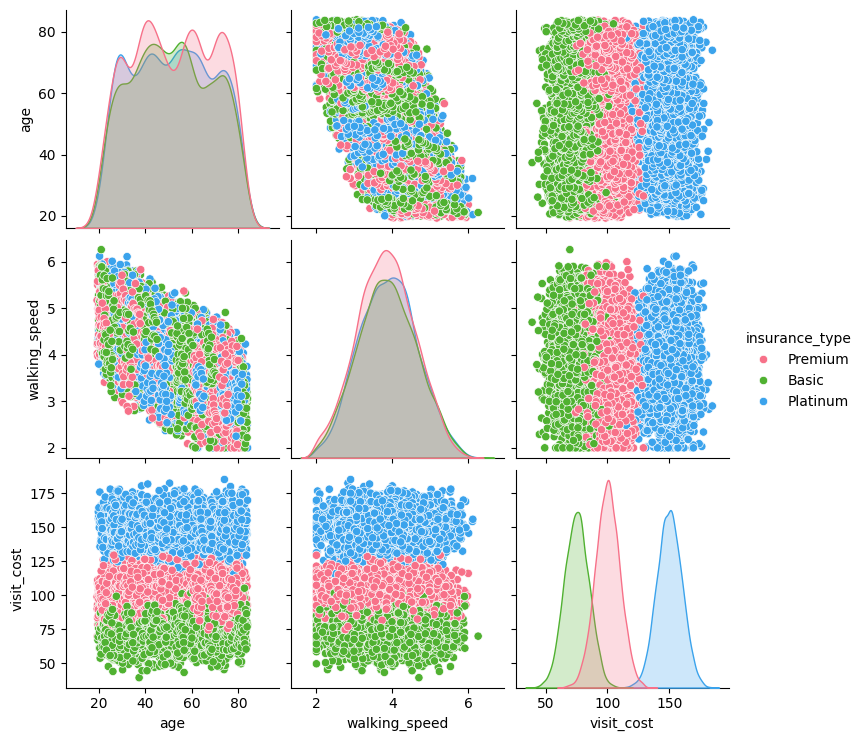

In [60]:
# Pair plot of key variables
key_var = ["age", "walking_speed", "visit_cost"]
sns.pairplot(data, vars=key_var, hue="insurance_type", diag_kind="kde", palette="husl")
plt.savefig("pairplot_key_variables.png", dpi=300)
plt.show()

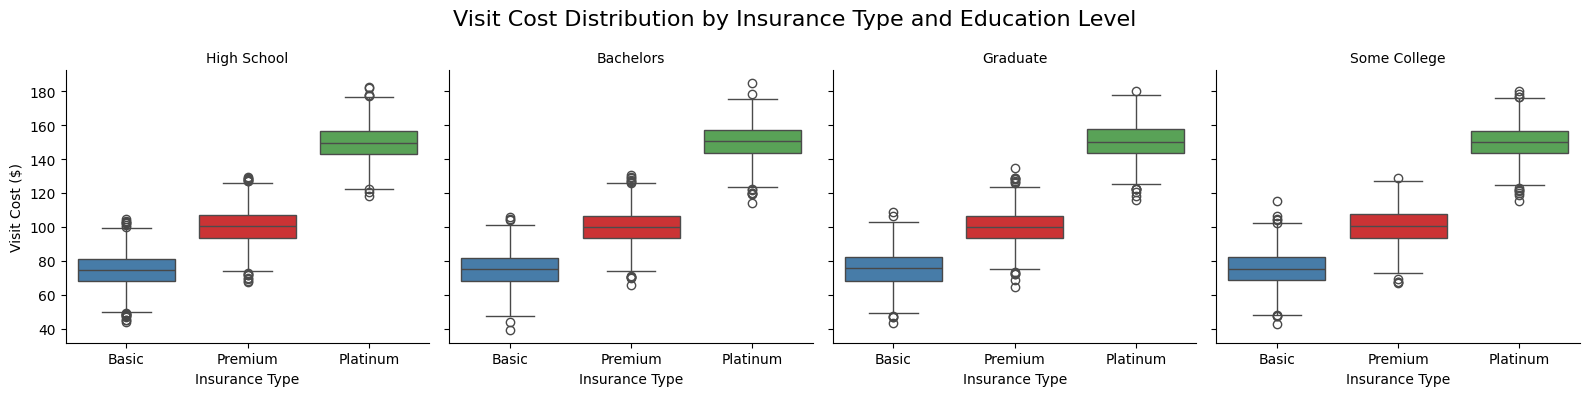

In [61]:
# Faceted plots by education/insurance
g = sns.FacetGrid(data, col="education_level", hue="insurance_type", palette="Set1", height=4)
g.map(sns.boxplot, "insurance_type", "visit_cost", order=["Basic", "Premium", "Platinum"])
g.set_axis_labels("Insurance Type", "Visit Cost ($)")
g.set_titles("{col_name}")
g.fig.suptitle("Visit Cost Distribution by Insurance Type and Education Level", fontsize=16)
g.fig.tight_layout()
plt.savefig("facet_edu_insur_costs.png", dpi=300)
plt.show()

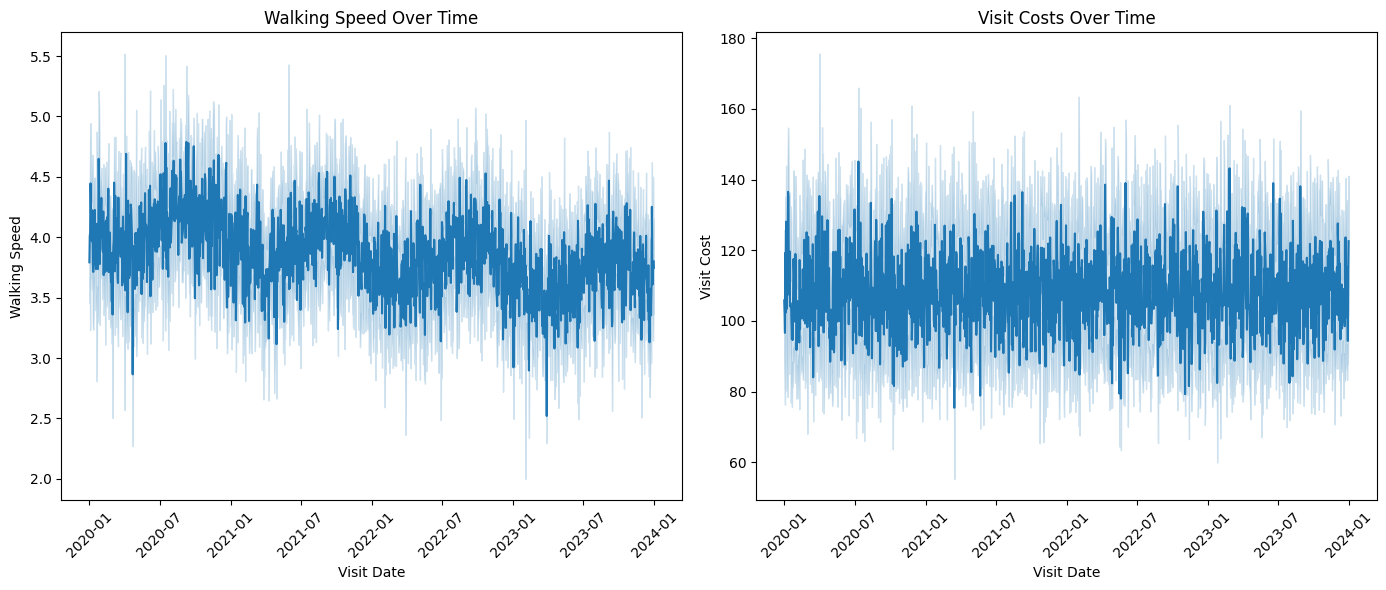

In [62]:
# Time trends 
data['visit_date'] = pd.to_datetime(data['visit_date'])
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Plot for walking speed
sns.lineplot(data=data, x="visit_date", y="walking_speed", ax=axes[0])
axes[0].set_title("Walking Speed Over Time")
axes[0].set_xlabel("Visit Date")
axes[0].set_ylabel("Walking Speed")
axes[0].tick_params(axis='x', rotation=45)

# Plot for visit cost
sns.lineplot(data=data, x="visit_date", y="visit_cost", ax=axes[1])
axes[1].set_title("Visit Costs Over Time")
axes[1].set_xlabel("Visit Date")
axes[1].set_ylabel("Visit Cost")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("time_trends.png", dpi=300)
plt.show()